In this tutorial we will visually explore the effects of the two parameters from the support vector classifier (SVC) when using the radial basis function kernel (RBF). This tutorial draws heavily on the code used in Sebastian Raschka's book [Python Machine Learning](http://amzn.to/2iyMbpA).

## Preliminaries

In [1]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC

## Create Function To Visualize Classification Regions

You can ignore the code below. It is used to visualize the the decision regions of the classifier. However it is unimportant to this tutorial to understand how the function works.

In [2]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

## Generate Data

Here we are generating some non-linearly separable data that we will train our classifier on. This data would be akin to your training dataset. There are two classes in our y vector: blue x's and red squares.

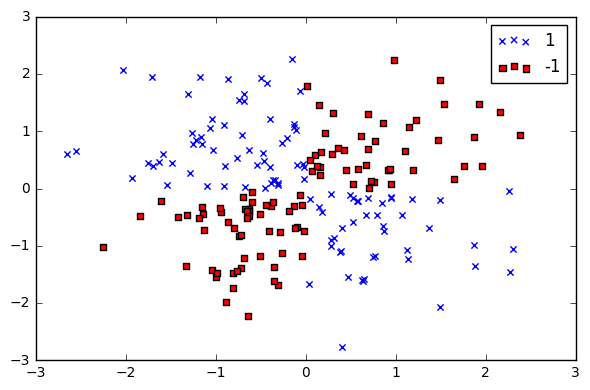

In [3]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Classify Using a Linear Kernel

The most basic way to use a SVC is with a linear kernel, which means the decision boundary is a straight line (or hyperplane in higher dimensions). Linear kernels are rarely used in practice, however I wanted to show it here since it is the most basic version of SVC. As can been seen below, it is not very good at classifying (which can be seen by all the blue X's in the red region) because the data is not linear.

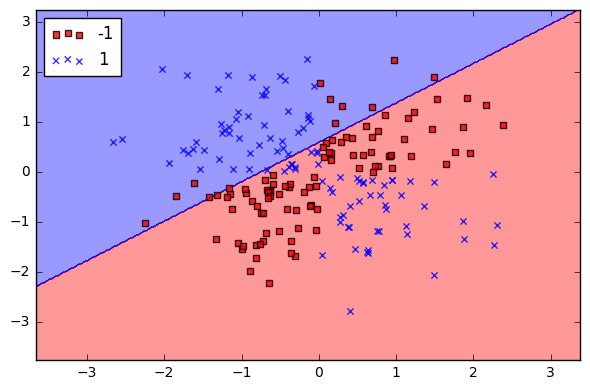

In [4]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Classify Using a RBF Kernel

Radial Basis Function is a commonly used kernel in SVC:

$$K(\mathbf {x} ,\mathbf {x'} )=\exp \left(-{\frac {||\mathbf {x} -\mathbf {x'} ||^{2}}{2\sigma ^{2}}}\right)$$

where $||\mathbf {x} -\mathbf {x'} ||^{2}$ is the squared Euclidean distance between two data points $\mathbf {x}$ and $\mathbf {x'}$. If this doesn't make sense, Sebastian's book has a full description. However, for this tutorial, it is only important to know that an SVC classifier using an RBF kernel has two parameters: `gamma` and `C`.

### Gamma

`gamma` is a parameter of the RBF kernel and can be thought of as the 'spread' of the kernel and therefore the decision region. When `gamma` is low, the 'curve' of the decision boundary is very low and thus the decision region is very broad. When `gamma` is high, the 'curve' of the decision boundary is high, which creates islands of decision-boundaries around data points. We will see this very clearly below.

### C

`C` is a parameter of the SVC learner and is the penalty for misclassifying a data point. When `C` is small, the classifier is okay with misclassified data points (high bias, low variance). When `C` is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).

## Gamma

In the four charts below, we apply the same SVC-RBF classifier to the same data while holding `C` constant. The only difference between each chart is that each time we will increase the value of `gamma`. By doing so, we can visually see the effect of `gamma` on the decision boundary.

### Gamma = 0.01

In the case of our SVC classifier and data, when using a low `gamma` like 0.01, the decision boundary is not very 'curvy', rather it is just one big sweeping arch.

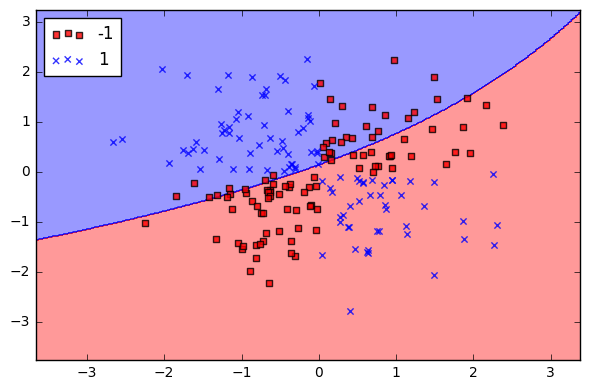

In [5]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Gamma = 1.0

You can see a big difference when we increase the `gamma` to 1. Now the decision boundary is starting to better cover the spread of the data.

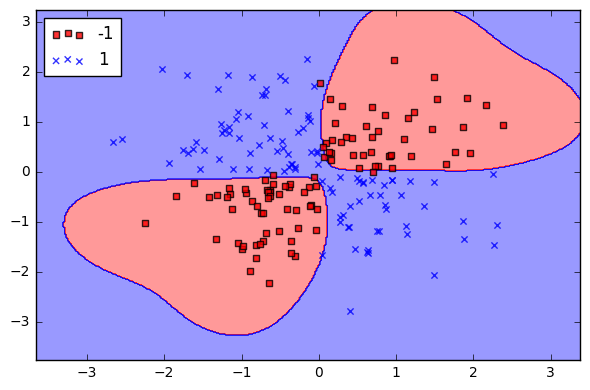

In [6]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Gamma = 10.0

At `gamma = 10` the spread of the kernel is less pronounced. The decision boundary starts to be highly effected by individual data points (i.e. variance).

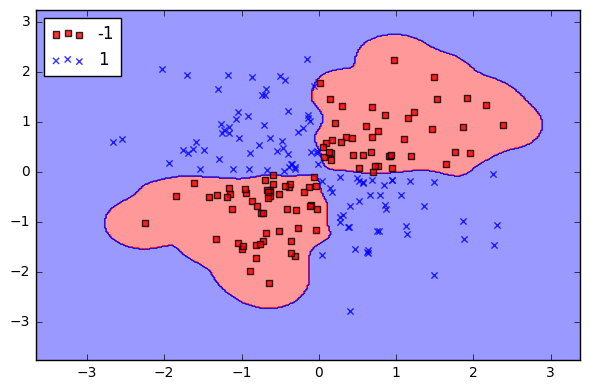

In [7]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=10, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Gamma = 100.0

With high `gamma`, the decision boundary is almost entirely dependent on individual data points, creating "islands". This data is clearly overfitted.

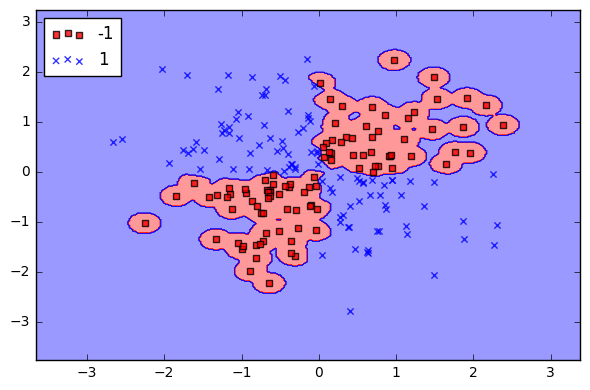

In [8]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## C - The Penalty Parameter

Now we will repeat the process for `C`: we will use the same classifier, same data, and hold `gamma` constant. The only thing we will change is the `C`, the penalty for misclassification.

### C = 1

With `C = 1`, the classifier is clearly tolerant of misclassified data point. There are many red points in the blue region and blue points in the red region.

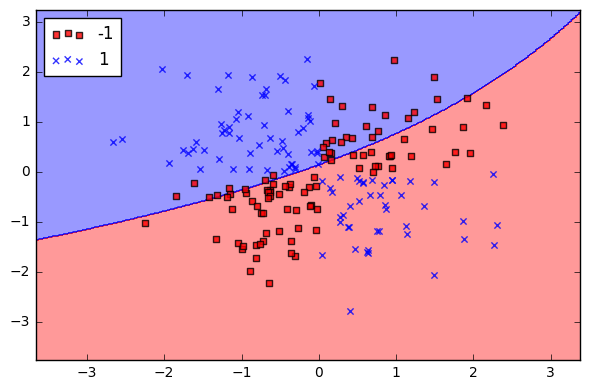

In [9]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### C = 10

At `C = 10`, the classifier is less tolerant to misclassified data points and therefore the decision boundary is more severe.

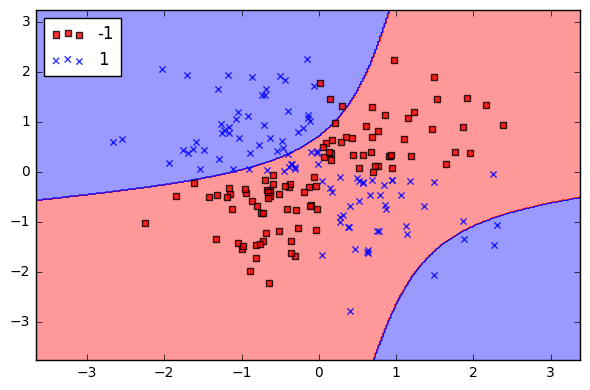

In [10]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### C = 1000

When `C = 1000`, the classifier starts to become very intolerant to misclassified data points and thus the decision boundary becomes less biased and has more variance (i.e. more dependent on the individual data points).

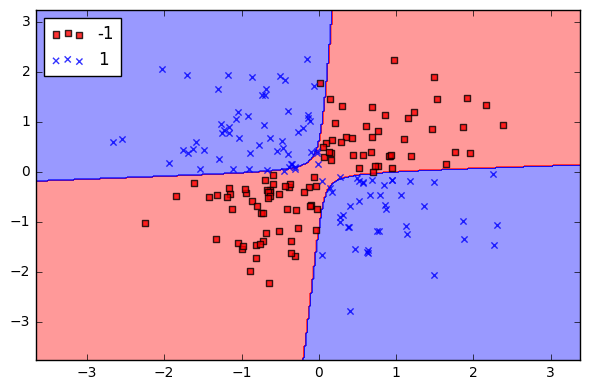

In [11]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### C = 10000

At `C = 10000`, the classifier "works really hard" to not misclassify data points and we see signs of overfitting.

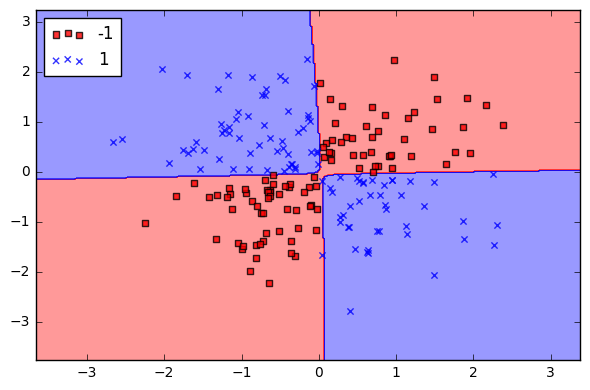

In [12]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=10000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### C = 100000

At `C = 100000`, the classifier is heavily penalized for any misclassified data points and therefore the margins are small.

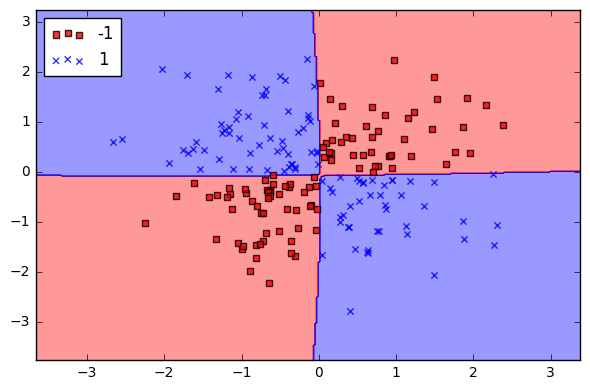

In [13]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=100000)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()